In [1]:
from IPython.display import Audio
import IPython


import matplotlib.pyplot as plt

import librosa
import librosa.display

In [2]:
import librosa

array, sampling_rate = librosa.load(librosa.ex("trumpet"))

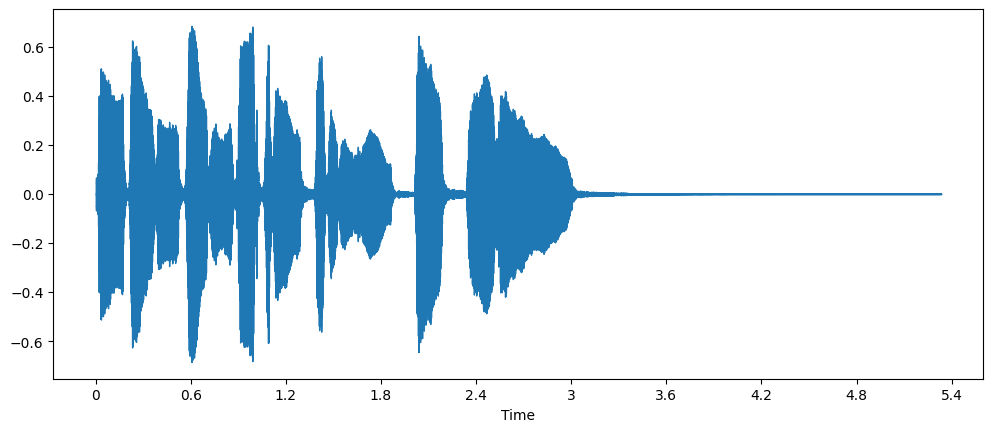

In [3]:
import matplotlib.pyplot as plt
import librosa.display

plt.figure().set_figwidth(12)
librosa.display.waveshow(array, sr=sampling_rate)

In [4]:

IPython.display.Audio(array, rate=sampling_rate)

# 주파수 스펙트럼(frequency spectrum)

오디오 데이터를 시각화하는 또 다른 방법은 오디오 신호의 주파수 스펙트럼을 그리는 것입니다. 이는 주파수 영역(frequency domain) 표현이라고도 합니다. 스펙트럼은 이산 푸리에 변환(DFT)을 사용하여 계산할 수 있습니다. 이를 통해 신호를 구성하고 있는 각각의 주파수들과 그 세기를 알 수 있습니다.

numpy의 rfft() 함수를 쓰면 DFT를 계산할 수 있습니다. 이를 아까의 트럼펫 소리에 적용시켜 주파수 스펙트럼을 그려봅시다. 전체 소리의 스펙트럼을 그릴 수도 있지만, 그보다는 작은 영역에 집중하는것이 더 낫습니다. 여기서는 첫 4096개의 샘플에 적용시켜보겠습니다. 이는 대략적으로 연주의 첫 음표의 길이에 해당합니다:

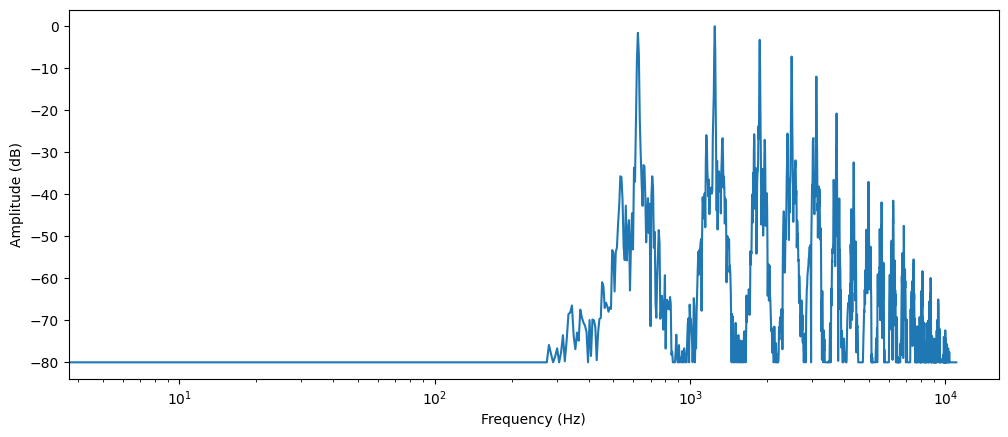

In [5]:
import numpy as np

dft_input = array[:4096]

# calculate the DFT
window = np.hanning(len(dft_input))
windowed_input = dft_input * window
dft = np.fft.rfft(windowed_input)

# get the amplitude spectrum in decibels
amplitude = np.abs(dft)
amplitude_db = librosa.amplitude_to_db(amplitude, ref=np.max)

# get the frequency bins
frequency = librosa.fft_frequencies(sr=sampling_rate, n_fft=len(dft_input))

plt.figure().set_figwidth(12)
plt.plot(frequency, amplitude_db)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (dB)")
plt.xscale("log")

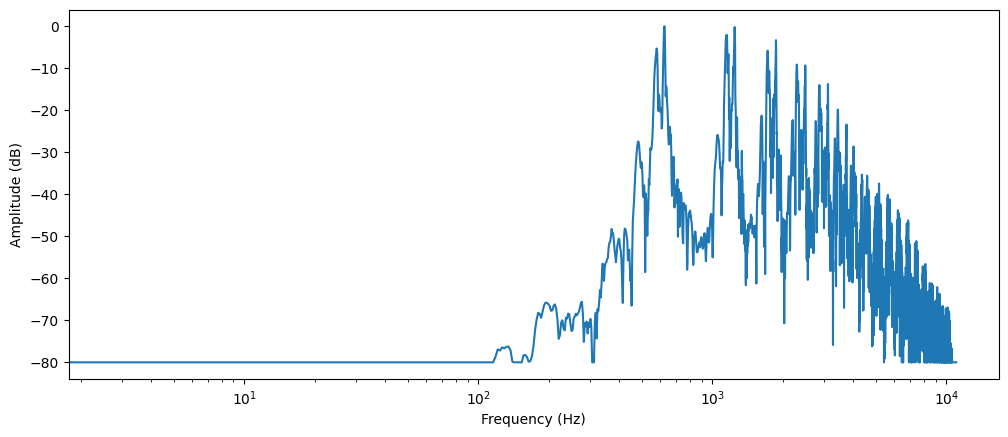

In [ ]:
import numpy as np

dft_input = array[:4096*2]

# calculate the DFT
window = np.hanning(len(dft_input))
windowed_input = dft_input * window
dft = np.fft.rfft(windowed_input)

# get the amplitude spectrum in decibels
amplitude = np.abs(dft)
amplitude_db = librosa.amplitude_to_db(amplitude, ref=np.max)   #  진폭값을 데시벨 스케일로 변환

# get the frequency bins
frequency = librosa.fft_frequencies(sr=sampling_rate, n_fft=len(dft_input))

plt.figure().set_figwidth(12)
plt.plot(frequency, amplitude_db)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (dB)")
plt.xscale("log")

# 스펙트로그램(spectrogram)

오디오 신호에서 주파수가 어떻게 변화하는지 보려면 무엇을 해야 할까요? 트럼펫 소리는 여러 음으로 구성돼있어서 여러 다른 주파수들로 이뤄져있습니다. 스펙트럼의 문제는 주어진 한 순간만의 주파수들을 보여준다는 것입니다. 이에 대한 해결법은 시간을 작은 구간들로 나누어 DFT를 적용하고, 그 결과인 스펙트럼들을 쌓아 스펙트로그램을 만드는 것입니다.

스펙트로그램은 오디오 신호의 주파수를 시간에 따라 변화하는 형태로 그립니다. 이를 통해 시간, 주파수, 진폭을 그래프에서 한눈에 볼 수 있습니다. 이 계산을 수행하는 알고리즘을 STFT(Short Time Fourier Transform)라 합니다.

스펙트로그램은 오디오를 다루는데 가장 유용한 툴 중 하나입니다. 예를 들어, 음악 녹음 작업을 다룰 때 다양한 악기와 보컬 트랙이 어떻게 전체 사운드에 기여하는지 볼 수 있습니다. 음성 작업의 경우, 모음을 발음할 때 각각의 모음들은 고유 주파수가 있기 때문에 서로 다른 모음인것을 식별할 수 있습니다.

librosa의 stft()와 specshow() 함수를 이용해 트럼펫 소리의 스펙트로그램을 그려보겠습니다:

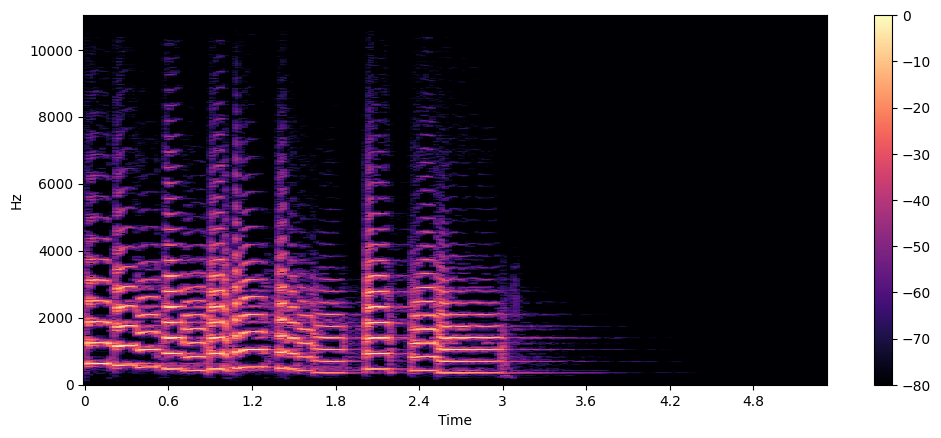

In [7]:
import numpy as np

D = librosa.stft(array)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_db, x_axis="time", y_axis="hz")
plt.colorbar()

# 멜 스펙트로그램

멜 스펙트로그램은 스펙트로그램의 한 종류로 음성 작업이나 머신러닝 작업에 주로 쓰입니다. 오디오 신호를 시간에 따른 주파수로 보여준다는 점에서 스펙트로그램과 비슷하지만, 다른 주파수 축을 사용합니다.

표준적인 스펙트로그램에선 주파수 축이 선형(linear)이며 헤르츠(Hz)단위로 측정됩니다. 그러나, 사람의 청각 시스템은 고주파보다 저주파에 더 민감하며, 이 민감성은 주파수가 증가함에 따라 로그함수적으로 감소합니다. 멜 스케일(mel scale)은 이런 사람의 비선형 주파수 반응을 근사한(approximate) 지각 스케일(perceptual scale)입니다.

멜 스펙트로그램을 만드려면 전처럼 STFT를 사용하고 오디오를 여러 짧은 구간으로 나눠 일련의 주파수 스펙트럼들을 얻어야 합니다. 그 후 추가적으로, 각 스펙트럼에 mel filterbank라고 불리는 필터들을 적용시켜 주파수를 멜 스케일로 변환합니다.

이 모든 단계를 대신 해주는 librosa의 melspectrogram() 함수를 이용하여 멜 스펙트로그램을 그려봅시다:

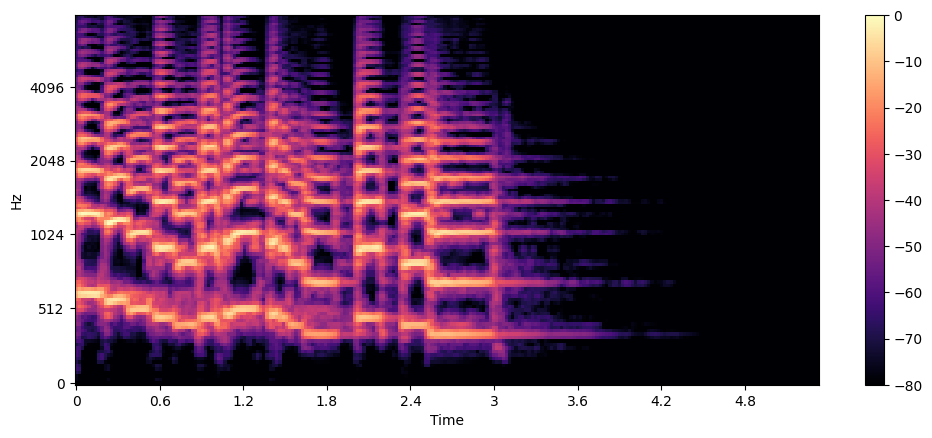

In [8]:
S = librosa.feature.melspectrogram(y=array, sr=sampling_rate, n_mels=128, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_dB, x_axis="time", y_axis="mel", sr=sampling_rate, fmax=8000)
plt.colorbar()

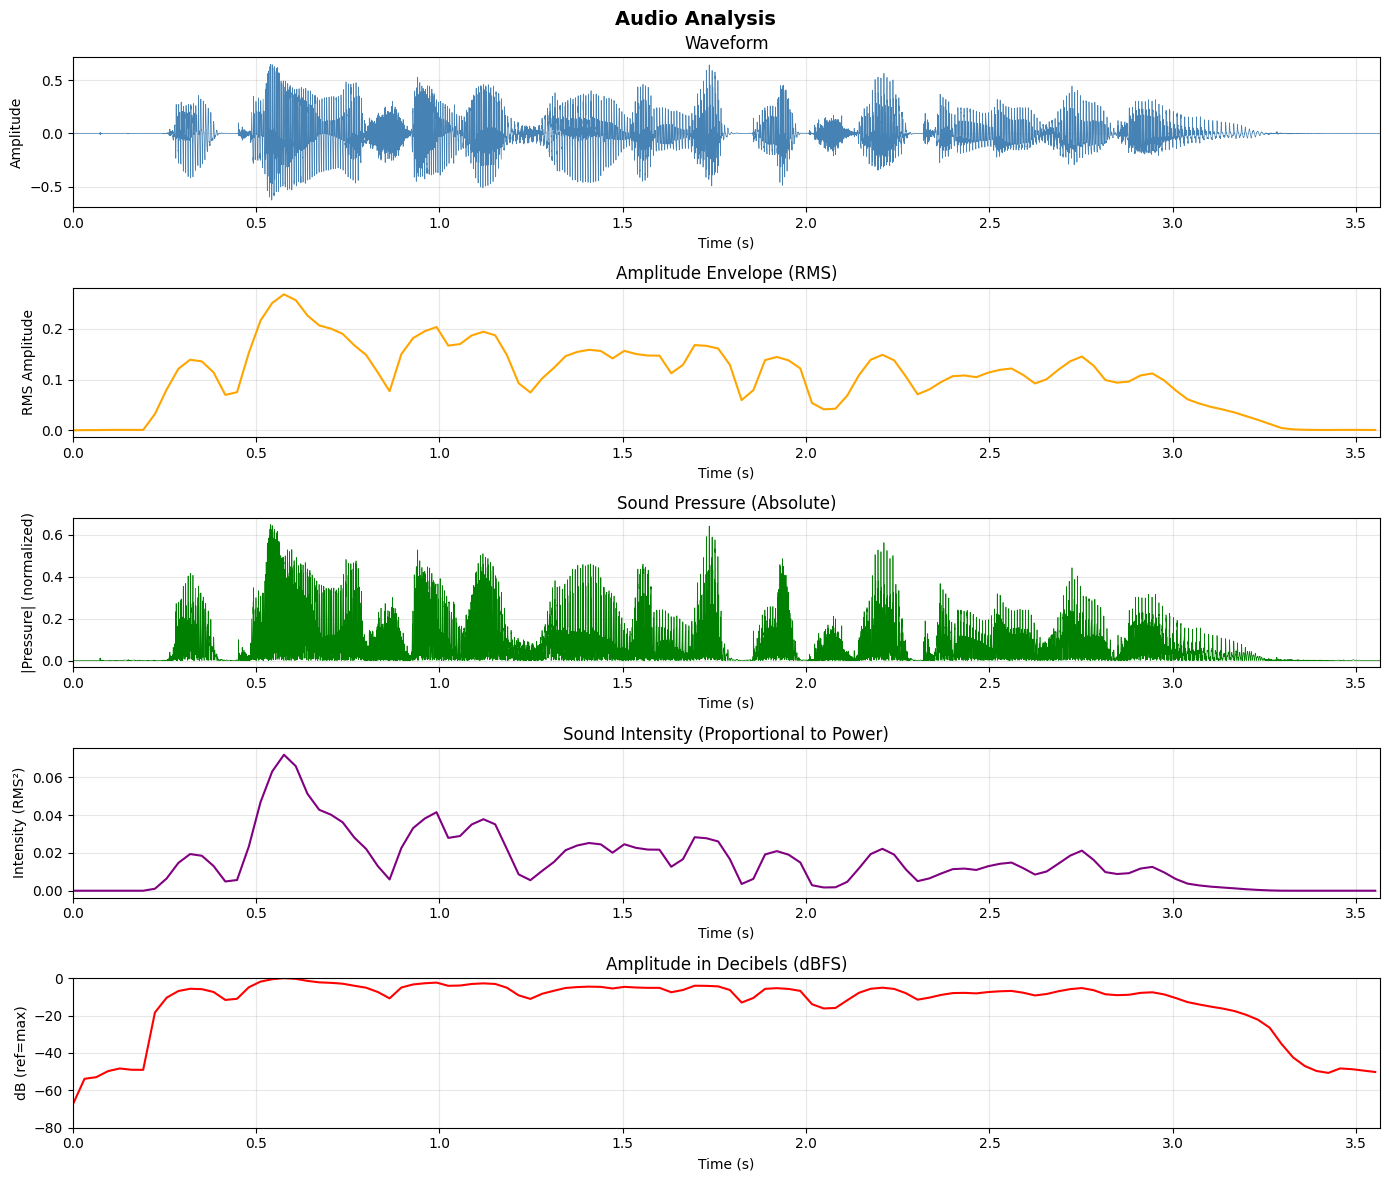

In [9]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from scipy.io import wavfile

# 오디오 로드
filename = "/home/khw/workspace/Sound/library/pyroomacoustics/notebooks/arctic_a0010.wav"

# librosa로 로드 (자동으로 float32, -1~1 정규화)
signal, fs = librosa.load(filename, sr=None)  # sr=None: 원본 샘플레이트 유지

# 시간 축 생성
time = np.arange(len(signal)) / fs

# 시각화
fig, axes = plt.subplots(5, 1, figsize=(14, 12))
fig.suptitle('Audio Analysis', fontsize=14, fontweight='bold')

# 1. 파형 (Waveform)
axes[0].plot(time, signal, color='steelblue', linewidth=0.5)
axes[0].set_xlabel('Time (s)')
axes[0].set_ylabel('Amplitude')
axes[0].set_title('Waveform')
axes[0].set_xlim([0, time[-1]])
axes[0].grid(True, alpha=0.3)

# 2. 진폭 (Amplitude Envelope) - RMS 기반
frame_length = 2048
hop_length = 512
rms = librosa.feature.rms(y=signal, frame_length=frame_length, hop_length=hop_length)[0]
rms_time = librosa.frames_to_time(np.arange(len(rms)), sr=fs, hop_length=hop_length)

axes[1].plot(rms_time, rms, color='orange', linewidth=1.5)
axes[1].set_xlabel('Time (s)')
axes[1].set_ylabel('RMS Amplitude')
axes[1].set_title('Amplitude Envelope (RMS)')
axes[1].set_xlim([0, time[-1]])
axes[1].grid(True, alpha=0.3)

# 3. 음압 (Sound Pressure) - 정규화된 신호 기준
# 음압은 파형과 유사하지만, 참조값 대비 표현
p_ref = 20e-6  # 참조 음압 (공기 중 가청 한계, Pa)
# 신호를 음압 스케일로 가정 (정규화된 값을 상대적 음압으로 해석)
pressure = signal  # 이미 정규화된 상태

axes[2].plot(time, np.abs(pressure), color='green', linewidth=0.5)
axes[2].set_xlabel('Time (s)')
axes[2].set_ylabel('|Pressure| (normalized)')
axes[2].set_title('Sound Pressure (Absolute)')
axes[2].set_xlim([0, time[-1]])
axes[2].grid(True, alpha=0.3)

# 4. 강도 (Intensity) - 진폭의 제곱에 비례
intensity = rms ** 2
axes[3].plot(rms_time, intensity, color='purple', linewidth=1.5)
axes[3].set_xlabel('Time (s)')
axes[3].set_ylabel('Intensity (RMS²)')
axes[3].set_title('Sound Intensity (Proportional to Power)')
axes[3].set_xlim([0, time[-1]])
axes[3].grid(True, alpha=0.3)

# 5. dB (Decibels) - RMS를 dB로 변환
rms_db = librosa.amplitude_to_db(rms, ref=np.max)  # 최대값 기준 상대 dB
axes[4].plot(rms_time, rms_db, color='red', linewidth=1.5)
axes[4].set_xlabel('Time (s)')
axes[4].set_ylabel('dB (ref=max)')
axes[4].set_title('Amplitude in Decibels (dBFS)')
axes[4].set_xlim([0, time[-1]])
axes[4].set_ylim([-80, 0])  # 일반적인 다이나믹 레인지
axes[4].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()